<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px"></p>

# Deep Neural Network (DNN or ANN)


<br>


📈Join our community: https://discord.gg/wXjNPAc5BH

📚Read our book: https://www.amazon.com/gp/product/B09HG18CYL 

🖥️Quantreo's YouTube channel: https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw

In [ ]:
!pip install yfinance
!pip install ta

     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 6.4 MB 10.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=8edb863cbf03379a169d9b640b3ca6fbd7c1c241ba5184f3df0ea2be7199e30f
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


In [ ]:
import numpy as np
import pandas as pd
import warnings
import yfinance as yf
import ta
warnings.filterwarnings("ignore")

In [ ]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

# Features engineering

In [ ]:
def feature_engineering(df):
    """ Create new variables"""
    
    # We copy the dataframe to avoid interferences in the data
    df_copy = df.copy()
    
    # Create the returns
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Create the SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Create the volatilities
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    
    # Create the Rsi
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi().shift(1)
    
    return df_copy.dropna()

# Data preparation

In [ ]:
def preprocessing_yf(symbol):
  
  #Import the data
  df = yf.download(symbol).dropna()

  #Rename
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  # Remove adj close
  del df["adj close"]

  return df

In [ ]:
df = preprocessing_yf("CADGBP=X")
dfc = feature_engineering(df)
dfc

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,volume,returns,SMA 15,SMA 60,MSD 10,MSD 30,rsi
time,,,,,,,,,,,
2004-02-23,0.40198,0.40340,0.39909,0.40081,0,-0.002240,0.403553,0.422755,0.006902,0.006871,37.097347
2004-02-24,0.40061,0.40158,0.39743,0.39799,0,-0.007036,0.402908,0.422004,0.006034,0.006825,36.025416
2004-02-25,0.39811,0.40089,0.39614,0.39972,0,0.004347,0.402347,0.421211,0.006151,0.006837,32.824894
2004-02-26,0.39963,0.40186,0.39814,0.39909,0,-0.001576,0.401721,0.420454,0.006367,0.006905,36.549112
2004-02-27,0.39933,0.40188,0.39846,0.40047,0,0.003458,0.401199,0.419719,0.006332,0.006896,35.771345
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-09,0.58088,0.58275,0.57980,0.58089,0,-0.003893,0.584833,0.585947,0.002602,0.002913,47.567174
2022-02-10,0.58260,0.58319,0.57940,0.58250,0,0.002772,0.584341,0.585755,0.002796,0.002995,41.822285
2022-02-11,0.57952,0.58065,0.57889,0.57951,0,-0.005133,0.584021,0.585672,0.003036,0.003005,46.735802


In [ ]:
dfc.columns

Index(['open', 'high', 'low', 'close', 'volume', 'returns', 'SMA 15', 'SMA 60',
       'MSD 10', 'MSD 30', 'rsi'],
      dtype='object')

In [ ]:
# Percentage train set
split = int(0.85*len(dfc))


# Train set creation
X_train = dfc[["SMA 15", "SMA 60", "MSD 10", "MSD 30", "rsi"]].iloc[:split,:]
y_train = dfc[["returns"]].iloc[:split,:]


# Test set creation
X_test = dfc[["SMA 15", "SMA 60", "MSD 10", "MSD 30", "rsi"]].iloc[split:,:]
y_test = dfc[["returns"]].iloc[split:,:]

y_train

,returns
time,
2004-02-23,-0.002240
2004-02-24,-0.007036
2004-02-25,0.004347
2004-02-26,-0.001576
2004-02-27,0.003458
...,...
2019-05-31,0.000751
2019-06-03,-0.001996
2019-06-04,0.003880


In [ ]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

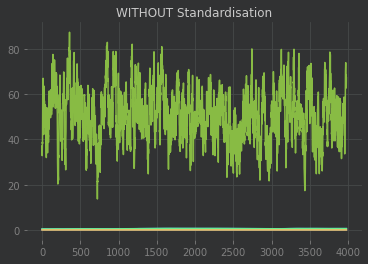

In [ ]:
plt.plot(X_train.values)
plt.title("WITHOUT Standardisation")
plt.show()

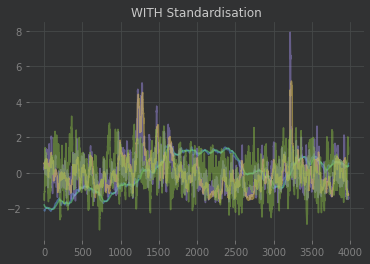

In [ ]:
plt.plot(X_train_sc, alpha=0.5)
plt.title("WITH Standardisation")
plt.show()

# DNN or ANN

In [ ]:
# LIBAIRIES
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nb_hidden_layer = 5


# INTIALIZATION SEQUENTIAL MODEL
regressor = Sequential()

# FIRST LAYER
regressor.add(Dense(500, input_shape=(X_train_sc.shape[1],), activation="relu"))

# ADD HIDDEN LAYER
for i in range(1,nb_hidden_layer):
  regressor.add(Dense(int(500/i), activation="relu"))


# OUTPUT LAYER DENSE
regressor.add(Dense(1, activation="linear"))

# COMPILE THE MODEL
regressor.compile(loss="mse", optimizer="adam")

# TRAINING
regressor.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=1000)

Epoch 1/10000
125/125 [==============================] - 3s 17ms/step - loss: 2.2332e-04 - val_loss: 6.6443e-05
Epoch 2/10000
125/125 [==============================] - 2s 13ms/step - loss: 4.6190e-05 - val_loss: 2.5771e-05
Epoch 3/10000
125/125 [==============================] - 2s 14ms/step - loss: 4.2095e-05 - val_loss: 2.5976e-05
Epoch 4/10000
125/125 [==============================] - 1s 10ms/step - loss: 4.0073e-05 - val_loss: 2.4692e-05
Epoch 5/10000
125/125 [==============================] - 1s 10ms/step - loss: 4.0715e-05 - val_loss: 2.8199e-05
Epoch 6/10000
125/125 [==============================] - 1s 9ms/step - loss: 4.3142e-05 - val_loss: 2.5307e-05
Epoch 7/10000
125/125 [==============================] - 1s 9ms/step - loss: 4.1619e-05 - val_loss: 2.3356e-05
Epoch 8/10000
125/125 [==============================] - 1s 10ms/step - loss: 3.9484e-05 - val_loss: 2.3111e-05
Epoch 9/10000
125/125 [==============================] - 1s 9ms/step - loss: 4.0219e-05 - val_loss: 2.4103

KeyboardInterrupt: ignored

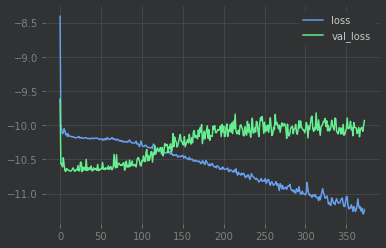

In [ ]:
np.log(pd.DataFrame(regressor.history.history)).plot()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# LIBAIRIES
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nb_hidden_layer = 2


# INTIALIZATION SEQUENTIAL MODEL
regressor = Sequential()

# FIRST LAYER
regressor.add(Dense(25, input_shape=(X_train_sc.shape[1],), activation="relu"))

# ADD HIDDEN LAYER
for i in range(1,nb_hidden_layer):
  regressor.add(Dense(int(25/i), activation="relu"))


# OUTPUT LAYER DENSE
regressor.add(Dense(1, activation="linear"))

# COMPILE THE MODEL
regressor.compile(loss="mse", optimizer="adam")

early_stop = EarlyStopping(verbose=1, patience = 5)

regressor.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100, callbacks=[early_stop])

Epoch 1/100
125/125 [==============================] - 0s 4ms/step - loss: 1.6960e-04 - val_loss: 2.4739e-04
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 1.5829e-04 - val_loss: 2.2574e-04
Epoch 3/100
125/125 [==============================] - 0s 4ms/step - loss: 1.4825e-04 - val_loss: 2.1616e-04
Epoch 4/100
125/125 [==============================] - 0s 4ms/step - loss: 1.4922e-04 - val_loss: 2.0242e-04
Epoch 5/100
125/125 [==============================] - 0s 4ms/step - loss: 1.3762e-04 - val_loss: 1.7270e-04
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: 1.2459e-04 - val_loss: 1.7975e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.2170e-04 - val_loss: 2.0950e-04
Epoch 8/100
125/125 [==============================] - 0s 4ms/step - loss: 1.1585e-04 - val_loss: 1.6911e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 1.1428e-04 - val_loss: 1.5576e-04
Epoch 10/100
125/12

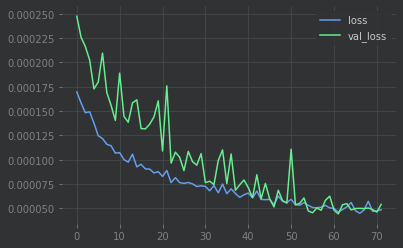

In [ ]:
pd.DataFrame(regressor.history.history).plot()

In [ ]:
# Create predictions for the whole dataset
dfc["prediction"] = regressor.predict(np.concatenate((X_train_sc,X_test_sc),
                                    axis=0))

# Compute the strategy
dfc["strategy"] = dfc["returns"] * np.sign(dfc["prediction"].shift(1))

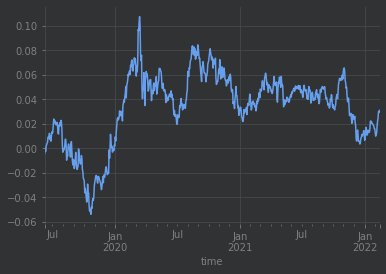

In [ ]:
dfc["strategy"].iloc[split:].cumsum().plot()

# Automatization

In [ ]:
def feature_engineering(df):
    """ Create new variables"""
    
    # We copy the dataframe to avoid interferences in the data
    df_copy = df.copy()
    
    # Create the returns
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Create the SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Create the volatilities
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    
    # Create the Rsi
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi().shift(1)
    
    return df_copy.dropna()

def preprocessing_yf(symbol):
  
  #Import the data
  df = yf.download(symbol).dropna()

  #Rename
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  # Remove adj close
  del df["adj close"]

  return df

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

def ANN(symbol, nb_neurons=25, nb_hidden_layer=2, nb_model=None):

  # Features engineering
  df = preprocessing_yf(symbol)
  dfc = feature_engineering(df)

  # Percentage train set
  split = int(0.85*len(dfc))
  split_val = int(0.95*len(dfc))

  # Train set creation
  X_train = dfc[['SMA 15', 'SMA 60',
        'MSD 10', 'MSD 30', 'rsi']].iloc[:split,:]
  y_train = dfc[["returns"]].iloc[:split]


  # Test set creation
  X_test = dfc[['SMA 15', 'SMA 60',
        'MSD 10', 'MSD 30', 'rsi']].iloc[split:,:]
  y_test = dfc[["returns"]].iloc[split:]
  

  # STANDARDISATION
  from sklearn.preprocessing import StandardScaler

  sc = StandardScaler()

  X_train_sc = sc.fit_transform(X_train)
  X_test_sc = sc.transform(X_test)


  # INTIALIZATION SEQUENTIAL MODEL
  regressor = Sequential()

  # FIRST LAYER
  regressor.add(Dense(25, input_shape=(X_train_sc.shape[1],), activation="relu"))

  # ADD HIDDEN LAYER
  for i in range(1,nb_hidden_layer):
    regressor.add(Dense(int(25/i), activation="relu"))


  # OUTPUT LAYER DENSE
  regressor.add(Dense(1, activation="linear"))

  # COMPILE THE MODEL
  regressor.compile(loss="mse", optimizer="adam")

  early_stop = EarlyStopping(verbose=1, patience = 5)

  regressor.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100, callbacks=[early_stop])

  # Create predictions for the whole dataset
  dfc["prediction"] = regressor.predict(np.concatenate((X_train_sc,X_test_sc),
                                      axis=0))

  # Compute the strategy
  dfc["strategy"] = np.sign(dfc["prediction"].shift(1)) * dfc["returns"]

  dfc["return"] = dfc["strategy"]

  if nb_model!=None:
    regressor.save_weights(f"Weights_ANN/ANN n°{nb_model}")
    return dfc["strategy"].iloc[split:split_val], dfc["strategy"].iloc[split_val:]

  else:
      return dfc["strategy"].iloc[split:split_val], dfc["strategy"].iloc[split_val:]



In [ ]:
sr = ANN("CADGBP=X", nb_model=15)

sr

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 2s 4ms/step - loss: 0.0110 - val_loss: 0.0021
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 8.7860e-04 - val_loss: 6.8035e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.0205e-04 - val_loss: 4.7030e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 3.4048e-04 - val_loss: 3.8581e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7148e-04 - val_loss: 2.6325e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.2672e-04 - val_loss: 2.8213e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.0361e-04 - val_loss: 2.4013e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.8100e-04 - val_loss: 2.0472e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

(time
 2019-06-07    0.004258
 2019-06-10    0.004528
 2019-06-11    0.002836
 2019-06-12    0.004293
 2019-06-13    0.001048
                 ...   
 2021-03-17   -0.002532
 2021-03-18   -0.001246
 2021-03-19   -0.004296
 2021-03-22   -0.004210
 2021-03-23    0.001992
 Name: strategy, Length: 468, dtype: float64, time
 2021-03-24   -0.004010
 2021-03-25   -0.003925
 2021-03-26    0.006200
 2021-03-29   -0.001681
 2021-03-30   -0.000746
                 ...   
 2022-02-09    0.003893
 2022-02-10    0.002772
 2022-02-11   -0.005133
 2022-02-14   -0.000690
 2022-02-15    0.000155
 Name: strategy, Length: 235, dtype: float64)

In [ ]:
# Library to estimate the time until the end of the loop
from tqdm import tqdm

# Empty lists to contain the returns
returns_test = []
returns_val = []


# Compute the returns during the test and validation periods
for i in tqdm(range(100)):
  test, val = ANN("CADGBP=X", nb_model=i)
  returns_test.append(test)
  returns_val.append(val)

  0%|          | 0/100 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 2s 10ms/step - loss: 0.0049 - val_loss: 9.1099e-04
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 7.0497e-04 - val_loss: 5.3639e-04
Epoch 3/100
125/125 [==============================] - 1s 5ms/step - loss: 4.2908e-04 - val_loss: 3.7357e-04
Epoch 4/100
125/125 [==============================] - 1s 4ms/step - loss: 3.0047e-04 - val_loss: 3.1115e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3381e-04 - val_loss: 2.1868e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 1.9564e-04 - val_loss: 1.7917e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.6553e-04 - val_loss: 1.9144e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.4922e-04 - val_loss: 1.4927e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/

  1%|          | 1/100 [00:15<24:54, 15.10s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0322 - val_loss: 0.0017
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 7.8681e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 8.4921e-04 - val_loss: 5.2140e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 6.5299e-04 - val_loss: 4.1787e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 5.2985e-04 - val_loss: 4.3139e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 4.4147e-04 - val_loss: 3.4658e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 3.7731e-04 - val_loss: 3.4335e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - loss: 3.30

  2%|▏         | 2/100 [00:30<24:34, 15.04s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0228 - val_loss: 0.0024
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 7.9213e-04 - val_loss: 9.1570e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 5.8754e-04 - val_loss: 9.0283e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 4.2940e-04 - val_loss: 8.8868e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 3.3778e-04 - val_loss: 6.1248e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 2.7687e-04 - val_loss: 6.1157e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 2.3612e-04 - val_loss: 5.2867e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - loss: 

  3%|▎         | 3/100 [00:44<23:51, 14.76s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0324 - val_loss: 0.0014
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 9.4276e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 8.2525e-04 - val_loss: 6.4473e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 6.0913e-04 - val_loss: 5.7623e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 4.9947e-04 - val_loss: 6.1311e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 4.2036e-04 - val_loss: 4.5971e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 3.7144e-04 - val_loss: 3.9815e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 3.2966e-04 - val_loss: 4.0502e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - lo

  4%|▍         | 4/100 [01:05<27:50, 17.40s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0088 - val_loss: 0.0010
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 9.7041e-04 - val_loss: 7.2530e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 6.1611e-04 - val_loss: 5.7364e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 4.4334e-04 - val_loss: 5.6969e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.5196e-04 - val_loss: 3.2596e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.8396e-04 - val_loss: 2.7968e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4788e-04 - val_loss: 2.4416e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 2.1067e-04 - val_loss: 2.8833e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

  5%|▌         | 5/100 [01:27<29:57, 18.92s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0076 - val_loss: 0.0013
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 7.1196e-04 - val_loss: 5.9266e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 4.2732e-04 - val_loss: 4.0716e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.1333e-04 - val_loss: 3.4771e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.5593e-04 - val_loss: 2.9721e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.2026e-04 - val_loss: 2.4916e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.9499e-04 - val_loss: 2.4862e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7413e-04 - val_loss: 2.1090e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

  6%|▌         | 6/100 [01:45<28:56, 18.47s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0056 - val_loss: 0.0011
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 6.3139e-04 - val_loss: 6.3068e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 3.9881e-04 - val_loss: 4.5062e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9743e-04 - val_loss: 4.8190e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 2.4213e-04 - val_loss: 3.0143e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.0555e-04 - val_loss: 2.8073e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.8189e-04 - val_loss: 2.5638e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.5827e-04 - val_loss: 1.9597e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

  7%|▋         | 7/100 [01:54<23:46, 15.33s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0122 - val_loss: 7.3288e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 9.8564e-04 - val_loss: 4.0776e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 4.8328e-04 - val_loss: 3.7657e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 3.1790e-04 - val_loss: 3.5078e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3401e-04 - val_loss: 2.0176e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 1.8968e-04 - val_loss: 2.4440e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.6143e-04 - val_loss: 1.5201e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.3919e-04 - val_loss: 1.4386e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/s

  8%|▊         | 8/100 [02:15<26:33, 17.32s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0085 - val_loss: 0.0016
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 7.5757e-04 - val_loss: 7.8056e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 4.7698e-04 - val_loss: 6.5934e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.8223e-04 - val_loss: 5.6925e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9491e-04 - val_loss: 4.2756e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.4527e-04 - val_loss: 3.2131e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.0940e-04 - val_loss: 3.3304e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8637e-04 - val_loss: 1.6850e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

  9%|▉         | 9/100 [02:26<23:22, 15.41s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0092 - val_loss: 0.0023
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 8.1111e-04 - val_loss: 8.7585e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.2210e-04 - val_loss: 6.3619e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0807e-04 - val_loss: 4.9435e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4816e-04 - val_loss: 3.2771e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9372e-04 - val_loss: 3.1724e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.6917e-04 - val_loss: 2.5310e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.4591e-04 - val_loss: 2.4014e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 10%|█         | 10/100 [03:04<33:29, 22.33s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0035 - val_loss: 6.3130e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 4.3497e-04 - val_loss: 2.9484e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7520e-04 - val_loss: 2.3488e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1234e-04 - val_loss: 1.8714e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 1.7549e-04 - val_loss: 1.6800e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.4844e-04 - val_loss: 1.4209e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.3717e-04 - val_loss: 1.1831e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.2430e-04 - val_loss: 1.9463e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/s

 11%|█         | 11/100 [03:21<30:40, 20.68s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0030 - val_loss: 8.8256e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 5.9201e-04 - val_loss: 4.0392e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 3.7329e-04 - val_loss: 3.3337e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7179e-04 - val_loss: 2.4538e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2971e-04 - val_loss: 2.5907e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9095e-04 - val_loss: 1.7270e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.7050e-04 - val_loss: 1.7154e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.4857e-04 - val_loss: 1.8339e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 12%|█▏        | 12/100 [03:33<26:23, 18.00s/it]

Epoch 00031: early stopping
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0013
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 5.0695e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 6.3412e-04 - val_loss: 4.6612e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.4083e-04 - val_loss: 3.7591e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 3.4254e-04 - val_loss: 2.9011e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8817e-04 - val_loss: 2.8940e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.5366e-04 - val_loss: 2.1081e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1997e-04 - val_loss: 2.4389e-04
Epoch 9/100
125/125 [======================

 13%|█▎        | 13/100 [04:04<31:47, 21.92s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0147 - val_loss: 0.0013
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 7.8484e-04 - val_loss: 5.7941e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.4092e-04 - val_loss: 4.6134e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.1379e-04 - val_loss: 4.0206e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4961e-04 - val_loss: 3.9145e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1060e-04 - val_loss: 3.0189e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8329e-04 - val_loss: 2.6018e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.6308e-04 - val_loss: 2.3888e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 14%|█▍        | 14/100 [04:25<31:14, 21.80s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0190 - val_loss: 0.0017
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 6.7025e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 7.0094e-04 - val_loss: 3.5544e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.4799e-04 - val_loss: 2.7977e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.4658e-04 - val_loss: 2.2356e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8327e-04 - val_loss: 1.8024e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 2.4704e-04 - val_loss: 1.6741e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2188e-04 - val_loss: 1.5409e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - lo

 15%|█▌        | 15/100 [04:37<26:21, 18.61s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 8.6650e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 4.2132e-04 - val_loss: 5.7824e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 2.6742e-04 - val_loss: 4.2431e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 1.9875e-04 - val_loss: 3.3224e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 1.5396e-04 - val_loss: 3.4768e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.3090e-04 - val_loss: 2.3113e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.1995e-04 - val_loss: 2.2612e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.0058e-04 - val_loss: 1.8540e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 16%|█▌        | 16/100 [04:52<24:32, 17.54s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0098 - val_loss: 9.5864e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 3.9332e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 5.2126e-04 - val_loss: 3.2282e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.8137e-04 - val_loss: 2.4431e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0368e-04 - val_loss: 1.7224e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3818e-04 - val_loss: 1.7369e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9481e-04 - val_loss: 1.3220e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7513e-04 - val_loss: 1.3638e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 17%|█▋        | 17/100 [05:05<22:37, 16.36s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0117 - val_loss: 0.0010
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 6.9735e-04 - val_loss: 5.7823e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.1291e-04 - val_loss: 3.9300e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.2117e-04 - val_loss: 3.7362e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.6376e-04 - val_loss: 3.0530e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2694e-04 - val_loss: 2.2074e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9925e-04 - val_loss: 1.9067e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.8144e-04 - val_loss: 1.6676e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 18%|█▊        | 18/100 [05:27<24:27, 17.90s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0010
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 6.9931e-04 - val_loss: 5.3819e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 4.3307e-04 - val_loss: 4.2425e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 3.2467e-04 - val_loss: 3.5847e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 2.4860e-04 - val_loss: 3.2072e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2525e-04 - val_loss: 3.3533e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.7907e-04 - val_loss: 2.3528e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.6433e-04 - val_loss: 2.8691e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

 19%|█▉        | 19/100 [05:48<25:36, 18.97s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0070 - val_loss: 0.0012
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 5.7093e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.7470e-04 - val_loss: 3.2887e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.0968e-04 - val_loss: 2.5566e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 3.0657e-04 - val_loss: 2.5409e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.4924e-04 - val_loss: 1.5829e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1443e-04 - val_loss: 1.8416e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9122e-04 - val_loss: 1.1533e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - lo

 20%|██        | 20/100 [06:00<22:13, 16.66s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0118 - val_loss: 0.0012
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 6.3087e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 6.4323e-04 - val_loss: 4.2354e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 4.4310e-04 - val_loss: 4.1545e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.3302e-04 - val_loss: 3.2854e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.7850e-04 - val_loss: 2.9968e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 2.3793e-04 - val_loss: 2.9976e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.0592e-04 - val_loss: 2.3909e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 21%|██        | 21/100 [06:11<19:53, 15.11s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0032 - val_loss: 5.8657e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 5.9468e-04 - val_loss: 2.8811e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 3.7648e-04 - val_loss: 1.9880e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9019e-04 - val_loss: 1.7521e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2217e-04 - val_loss: 1.7228e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 1.8958e-04 - val_loss: 1.0921e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.5302e-04 - val_loss: 1.0364e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.4061e-04 - val_loss: 8.2392e-05
Epoch 9/100
125/125 [==============================] - 0s 2ms/s

 22%|██▏       | 22/100 [06:22<18:00, 13.86s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0951 - val_loss: 0.0030
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 7.9938e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 8.7791e-04 - val_loss: 5.5424e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 6.3108e-04 - val_loss: 4.1084e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 5.1384e-04 - val_loss: 3.8063e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 4.3303e-04 - val_loss: 3.1028e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 3.8056e-04 - val_loss: 2.7009e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 3.34

 23%|██▎       | 23/100 [06:40<19:20, 15.07s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0125 - val_loss: 8.7140e-04
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 7.4638e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.7214e-04 - val_loss: 5.6718e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.9742e-04 - val_loss: 5.7464e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0124e-04 - val_loss: 4.5808e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4195e-04 - val_loss: 2.9645e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 2.0301e-04 - val_loss: 2.7389e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7678e-04 - val_loss: 2.9628e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 24%|██▍       | 24/100 [06:56<19:18, 15.25s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0026 - val_loss: 3.9475e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 5.8807e-04 - val_loss: 2.3204e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 3.9489e-04 - val_loss: 2.1510e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8229e-04 - val_loss: 1.7536e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 2.2281e-04 - val_loss: 1.5465e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8832e-04 - val_loss: 1.5736e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.5248e-04 - val_loss: 1.4453e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.3279e-04 - val_loss: 1.1983e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/s

 25%|██▌       | 25/100 [07:08<18:05, 14.48s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0158 - val_loss: 0.0022
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 6.3790e-04 - val_loss: 7.1127e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.3125e-04 - val_loss: 4.8745e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.3491e-04 - val_loss: 4.2331e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.7562e-04 - val_loss: 3.6143e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4434e-04 - val_loss: 3.0245e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1882e-04 - val_loss: 2.8429e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 

 26%|██▌       | 26/100 [07:30<20:27, 16.58s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 2s 10ms/step - loss: 0.0035 - val_loss: 6.2867e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 4.3554e-04 - val_loss: 3.8100e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 3.0573e-04 - val_loss: 2.7925e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 2.3143e-04 - val_loss: 2.3761e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8565e-04 - val_loss: 2.3391e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 1.5624e-04 - val_loss: 1.9251e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.3996e-04 - val_loss: 1.3904e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.2326e-04 - val_loss: 1.2643e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/

 27%|██▋       | 27/100 [07:51<21:57, 18.05s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0154 - val_loss: 0.0021
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 9.6431e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 9.0059e-04 - val_loss: 5.5415e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 5.7858e-04 - val_loss: 4.0899e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 4.0386e-04 - val_loss: 3.4571e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 3.3503e-04 - val_loss: 2.8755e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8449e-04 - val_loss: 3.1997e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4412e-04 - val_loss: 2.3895e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - lo

 28%|██▊       | 28/100 [08:03<19:32, 16.29s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0191 - val_loss: 0.0032
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 7.9968e-04 - val_loss: 0.0013
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 5.9055e-04 - val_loss: 0.0011
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 4.7383e-04 - val_loss: 8.3139e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.9678e-04 - val_loss: 7.1485e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 3.3794e-04 - val_loss: 6.3331e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8413e-04 - val_loss: 5.4561e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 2.5481e-

 29%|██▉       | 29/100 [08:45<28:24, 24.01s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0100 - val_loss: 0.0012
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 9.1509e-04 - val_loss: 6.0946e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.8404e-04 - val_loss: 3.8859e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.4066e-04 - val_loss: 3.1974e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.6105e-04 - val_loss: 2.3175e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.1962e-04 - val_loss: 2.0017e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.8803e-04 - val_loss: 2.0009e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.6734e-04 - val_loss: 1.7022e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

 30%|███       | 30/100 [09:11<28:41, 24.59s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0177 - val_loss: 0.0017
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 8.2398e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 6.8254e-04 - val_loss: 4.4770e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.6811e-04 - val_loss: 3.4414e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.6200e-04 - val_loss: 2.7454e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9717e-04 - val_loss: 2.2721e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4201e-04 - val_loss: 2.1891e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1175e-04 - val_loss: 2.1677e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 31%|███       | 31/100 [09:22<23:23, 20.34s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0110 - val_loss: 0.0015
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 9.1290e-04 - val_loss: 9.6740e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.6255e-04 - val_loss: 6.8120e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 4.2799e-04 - val_loss: 5.6373e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.4510e-04 - val_loss: 5.0251e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9298e-04 - val_loss: 4.2036e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7015e-04 - val_loss: 3.7819e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 2.4393e-04 - val_loss: 4.2029e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 32%|███▏      | 32/100 [09:46<24:30, 21.63s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0056 - val_loss: 0.0014
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 7.1054e-04 - val_loss: 8.5547e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.0419e-04 - val_loss: 6.4268e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.1026e-04 - val_loss: 3.3931e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 2.4467e-04 - val_loss: 3.5966e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1231e-04 - val_loss: 2.8073e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8743e-04 - val_loss: 1.9220e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.6187e-04 - val_loss: 2.2382e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 33%|███▎      | 33/100 [09:53<19:13, 17.22s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0093 - val_loss: 0.0015
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 9.6025e-04 - val_loss: 7.1894e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.6450e-04 - val_loss: 4.5346e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.0690e-04 - val_loss: 3.9033e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.2182e-04 - val_loss: 3.2125e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8183e-04 - val_loss: 2.7618e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3030e-04 - val_loss: 2.5106e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.0827e-04 - val_loss: 2.1578e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 34%|███▍      | 34/100 [10:15<20:20, 18.50s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0076 - val_loss: 0.0011
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 6.9716e-04 - val_loss: 6.8047e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.7741e-04 - val_loss: 4.8787e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.6078e-04 - val_loss: 3.8187e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8945e-04 - val_loss: 3.4560e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3520e-04 - val_loss: 2.6768e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9613e-04 - val_loss: 2.5177e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7042e-04 - val_loss: 2.1637e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

 35%|███▌      | 35/100 [10:42<22:58, 21.21s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0217 - val_loss: 0.0024
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 7.6262e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 7.6736e-04 - val_loss: 5.1950e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 5.3735e-04 - val_loss: 4.6671e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 4.4486e-04 - val_loss: 4.5763e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.6244e-04 - val_loss: 3.4582e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 3.1349e-04 - val_loss: 3.6610e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7553e-04 - val_loss: 2.6222e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 36%|███▌      | 36/100 [11:04<22:42, 21.29s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0028 - val_loss: 7.2698e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 6.2953e-04 - val_loss: 4.9140e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 3.7497e-04 - val_loss: 3.1280e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 2.5839e-04 - val_loss: 2.6146e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 1.9557e-04 - val_loss: 2.0967e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.5616e-04 - val_loss: 1.7650e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.3492e-04 - val_loss: 1.6121e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.2147e-04 - val_loss: 1.6817e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 37%|███▋      | 37/100 [11:25<22:24, 21.34s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0065 - val_loss: 0.0011
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 6.4458e-04 - val_loss: 5.9847e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 3.5788e-04 - val_loss: 3.6260e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 2.7535e-04 - val_loss: 3.2466e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2081e-04 - val_loss: 2.7083e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9312e-04 - val_loss: 2.5100e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.7348e-04 - val_loss: 2.0644e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.5625e-04 - val_loss: 1.8875e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

 38%|███▊      | 38/100 [11:53<23:52, 23.11s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0141 - val_loss: 0.0021
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 8.7044e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 7.2342e-04 - val_loss: 5.6345e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.9703e-04 - val_loss: 4.7714e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 3.6949e-04 - val_loss: 3.4291e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0180e-04 - val_loss: 3.5471e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.6114e-04 - val_loss: 3.2224e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2993e-04 - val_loss: 3.3759e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 39%|███▉      | 39/100 [12:02<19:13, 18.91s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0062 - val_loss: 0.0011
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 5.4753e-04 - val_loss: 8.8690e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 3.6913e-04 - val_loss: 6.3695e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9568e-04 - val_loss: 3.5365e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3761e-04 - val_loss: 3.5466e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1326e-04 - val_loss: 2.3918e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7056e-04 - val_loss: 1.7359e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.5166e-04 - val_loss: 1.4907e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 40%|████      | 40/100 [12:07<14:55, 14.92s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0027 - val_loss: 6.0244e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 3.3221e-04 - val_loss: 3.6780e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2965e-04 - val_loss: 2.7740e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7946e-04 - val_loss: 2.2938e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 1.4055e-04 - val_loss: 1.5551e-04
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: 1.2062e-04 - val_loss: 1.5038e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.0420e-04 - val_loss: 1.0015e-04
Epoch 8/100
125/125 [==============================] - 0s 4ms/step - loss: 9.5209e-05 - val_loss: 9.4317e-05
Epoch 9/100
125/125 [==============================] - 0s 4ms/s

 41%|████      | 41/100 [12:18<13:35, 13.83s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0138 - val_loss: 0.0011
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 5.7084e-04 - val_loss: 5.7569e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 3.4766e-04 - val_loss: 4.2751e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.5163e-04 - val_loss: 3.5087e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 2.0355e-04 - val_loss: 2.6802e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.6357e-04 - val_loss: 2.4253e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.4386e-04 - val_loss: 1.6904e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.2393e-04 - val_loss: 1.4940e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

 42%|████▏     | 42/100 [13:01<21:34, 22.32s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0078 - val_loss: 0.0014
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 8.5541e-04 - val_loss: 7.4078e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.2560e-04 - val_loss: 5.5878e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.6090e-04 - val_loss: 4.1054e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8211e-04 - val_loss: 3.4237e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2752e-04 - val_loss: 2.7526e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9029e-04 - val_loss: 2.4051e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.6481e-04 - val_loss: 2.2250e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 43%|████▎     | 43/100 [13:22<20:58, 22.09s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 2s 4ms/step - loss: 0.0214 - val_loss: 0.0031
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 7.7916e-04 - val_loss: 7.8240e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 6.0145e-04 - val_loss: 7.0817e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 4.8207e-04 - val_loss: 6.4133e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 3.9645e-04 - val_loss: 7.1468e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 3.2701e-04 - val_loss: 5.2233e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8383e-

 44%|████▍     | 44/100 [13:38<18:55, 20.28s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0114 - val_loss: 0.0020
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 7.8596e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 7.1767e-04 - val_loss: 4.6193e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 4.8810e-04 - val_loss: 3.8580e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.7651e-04 - val_loss: 2.8994e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9096e-04 - val_loss: 2.5136e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2976e-04 - val_loss: 2.1456e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.8816e-04 - val_loss: 2.0069e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 45%|████▌     | 45/100 [13:56<17:48, 19.43s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0103 - val_loss: 9.4431e-04
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 7.6812e-04 - val_loss: 4.3710e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.9998e-04 - val_loss: 5.0325e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.4834e-04 - val_loss: 4.0388e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7134e-04 - val_loss: 2.5808e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1405e-04 - val_loss: 3.3323e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8326e-04 - val_loss: 3.2395e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.6917e-04 - val_loss: 2.0135e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 46%|████▌     | 46/100 [14:07<15:17, 16.98s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0519 - val_loss: 0.0022
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 7.1426e-04 - val_loss: 7.7248e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 5.1803e-04 - val_loss: 5.9537e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 4.1299e-04 - val_loss: 4.7600e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 3.4070e-04 - val_loss: 4.2520e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9405e-04 - val_loss: 3.5819e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 2.5058e-

 47%|████▋     | 47/100 [14:17<13:16, 15.02s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0602 - val_loss: 0.0053
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 8.9838e-04 - val_loss: 8.0649e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 7.0320e-04 - val_loss: 7.4088e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 5.7777e-04 - val_loss: 6.6608e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 5.0016e-04 - val_loss: 4.6294e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 4.2854e-04 - val

 48%|████▊     | 48/100 [14:59<20:02, 23.13s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0194 - val_loss: 0.0031
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 9.5131e-04 - val_loss: 0.0013
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 6.3164e-04 - val_loss: 9.6221e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 4.5754e-04 - val_loss: 7.8896e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.5206e-04 - val_loss: 6.5427e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8377e-04 - val_loss: 5.5889e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 2.4020e-04 - val_loss: 4.3339e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 2.06

 49%|████▉     | 49/100 [15:21<19:14, 22.65s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0245 - val_loss: 0.0040
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 9.8228e-04 - val_loss: 0.0012
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 6.5606e-04 - val_loss: 8.3963e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 5.0455e-04 - val_loss: 7.7496e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.8767e-04 - val_loss: 6.0311e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 3.3350e-04 - val_loss: 4.7196e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 2.8934e-04 - val_loss: 4.1185e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 2.51

 50%|█████     | 50/100 [15:42<18:35, 22.31s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0079 - val_loss: 9.3687e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 5.9596e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.0062e-04 - val_loss: 2.9266e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.1361e-04 - val_loss: 3.0498e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3255e-04 - val_loss: 2.4845e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9533e-04 - val_loss: 1.5144e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.6812e-04 - val_loss: 1.8890e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.5319e-04 - val_loss: 1.6892e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

 51%|█████     | 51/100 [15:55<15:51, 19.42s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0053 - val_loss: 5.4776e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 4.7342e-04 - val_loss: 4.4666e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8952e-04 - val_loss: 3.7848e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1330e-04 - val_loss: 2.7245e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7301e-04 - val_loss: 2.5358e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.4947e-04 - val_loss: 1.8344e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.3577e-04 - val_loss: 2.0998e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.2351e-04 - val_loss: 1.6684e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 52%|█████▏    | 52/100 [16:07<13:35, 17.00s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0087 - val_loss: 0.0012
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 6.8168e-04 - val_loss: 7.7616e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.5639e-04 - val_loss: 5.1602e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.2218e-04 - val_loss: 3.4791e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 2.4090e-04 - val_loss: 2.8830e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9837e-04 - val_loss: 3.2174e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.6856e-04 - val_loss: 2.1751e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.4813e-04 - val_loss: 2.0422e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

 53%|█████▎    | 53/100 [16:19<12:17, 15.69s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0035 - val_loss: 0.0010
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 5.9318e-04 - val_loss: 5.8342e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 3.1625e-04 - val_loss: 3.9562e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1681e-04 - val_loss: 3.7665e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7259e-04 - val_loss: 2.4342e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.4703e-04 - val_loss: 2.2872e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.2525e-04 - val_loss: 2.1249e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.1871e-04 - val_loss: 1.6041e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

 54%|█████▍    | 54/100 [16:31<11:07, 14.52s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0104 - val_loss: 0.0015
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 7.7263e-04 - val_loss: 6.5804e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.7528e-04 - val_loss: 4.1779e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.8108e-04 - val_loss: 3.3552e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9995e-04 - val_loss: 3.0246e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.5289e-04 - val_loss: 3.1282e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1892e-04 - val_loss: 2.7832e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9811e-04 - val_loss: 2.3271e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 55%|█████▌    | 55/100 [16:52<12:27, 16.60s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0052 - val_loss: 3.7396e-04
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 4.7002e-04 - val_loss: 2.8330e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8180e-04 - val_loss: 2.6158e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1826e-04 - val_loss: 2.7593e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8747e-04 - val_loss: 1.7890e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.5996e-04 - val_loss: 1.5885e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.5362e-04 - val_loss: 1.3840e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.3153e-04 - val_loss: 1.3811e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 56%|█████▌    | 56/100 [17:04<11:03, 15.08s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0290 - val_loss: 0.0024
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 8.2645e-04 - val_loss: 8.6654e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.8263e-04 - val_loss: 7.1864e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.3702e-04 - val_loss: 5.8783e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7686e-04 - val_loss: 4.9457e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3631e-04 - val_loss: 4.6319e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.0495e-04 - val_loss: 4.2490e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 

 57%|█████▋    | 57/100 [17:25<12:11, 17.01s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0123 - val_loss: 8.1842e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 8.8872e-04 - val_loss: 7.5672e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.5330e-04 - val_loss: 6.3757e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.9129e-04 - val_loss: 5.2678e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0266e-04 - val_loss: 4.2946e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4707e-04 - val_loss: 4.0372e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1213e-04 - val_loss: 3.7956e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8505e-04 - val_loss: 3.0080e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 58%|█████▊    | 58/100 [17:46<12:44, 18.19s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0051 - val_loss: 8.7435e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 7.3349e-04 - val_loss: 4.6716e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.4451e-04 - val_loss: 4.0080e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.3984e-04 - val_loss: 3.0611e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.6054e-04 - val_loss: 2.4537e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2566e-04 - val_loss: 2.0083e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8913e-04 - val_loss: 1.8808e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7024e-04 - val_loss: 1.7926e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 59%|█████▉    | 59/100 [17:57<10:50, 15.86s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 6.7779e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 6.6370e-04 - val_loss: 6.4110e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 3.8827e-04 - val_loss: 4.1425e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9915e-04 - val_loss: 3.7867e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3605e-04 - val_loss: 2.5553e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.0509e-04 - val_loss: 2.8190e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.7441e-04 - val_loss: 2.1448e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.6953e-04 - val_loss: 1.7949e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 60%|██████    | 60/100 [18:13<10:35, 15.88s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 2s 4ms/step - loss: 0.0042 - val_loss: 0.0014
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 6.7632e-04 - val_loss: 6.3527e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.4447e-04 - val_loss: 4.0109e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.2785e-04 - val_loss: 2.6037e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 2.6113e-04 - val_loss: 2.7281e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2128e-04 - val_loss: 2.0154e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9139e-04 - val_loss: 1.5061e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.6923e-04 - val_loss: 1.5887e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

 61%|██████    | 61/100 [18:29<10:21, 15.93s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0083 - val_loss: 0.0011
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 8.7098e-04 - val_loss: 6.3770e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.3360e-04 - val_loss: 5.2857e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.8852e-04 - val_loss: 4.1589e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.3667e-04 - val_loss: 3.5350e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.5905e-04 - val_loss: 3.1830e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3856e-04 - val_loss: 2.8977e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1392e-04 - val_loss: 2.6771e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 62%|██████▏   | 62/100 [18:51<11:22, 17.95s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0103 - val_loss: 9.3777e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 7.4872e-04 - val_loss: 4.9742e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.3712e-04 - val_loss: 3.0073e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0320e-04 - val_loss: 1.5366e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3758e-04 - val_loss: 1.1487e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9372e-04 - val_loss: 1.2091e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.6644e-04 - val_loss: 1.0608e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.4982e-04 - val_loss: 9.2056e-05
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 63%|██████▎   | 63/100 [19:03<09:49, 15.93s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0065 - val_loss: 0.0015
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 8.5439e-04 - val_loss: 6.1279e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.7227e-04 - val_loss: 3.9173e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.2012e-04 - val_loss: 2.8354e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.5187e-04 - val_loss: 2.5601e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.0395e-04 - val_loss: 2.1897e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7540e-04 - val_loss: 1.6902e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.5790e-04 - val_loss: 1.5028e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 64%|██████▍   | 64/100 [19:18<09:25, 15.72s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0271 - val_loss: 0.0020
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 6.7160e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 7.1455e-04 - val_loss: 5.2461e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 5.5770e-04 - val_loss: 4.9456e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 4.3655e-04 - val_loss: 3.7148e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 3.6323e-04 - val_loss: 3.4807e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 3.2195e-04 - val_loss: 3.3039e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 2.80

 65%|██████▌   | 65/100 [19:43<10:43, 18.39s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0138 - val_loss: 0.0013
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 8.3054e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 6.7548e-04 - val_loss: 6.6561e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.7141e-04 - val_loss: 4.4056e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.5849e-04 - val_loss: 3.4566e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.9064e-04 - val_loss: 3.6820e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 2.4207e-04 - val_loss: 2.6578e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1155e-04 - val_loss: 2.2292e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - lo

 66%|██████▌   | 66/100 [20:06<11:20, 20.00s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0340 - val_loss: 0.0039
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 7.3177e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 8.4566e-04 - val_loss: 5.0699e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 6.4743e-04 - val_loss: 3.8068e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 5.1351e-04 - val_loss: 3.7156e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 4.3148e-04 - val_loss: 2.6784e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 3.6265e-04 - val_loss: 2.5912e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - loss: 3.21

 67%|██████▋   | 67/100 [20:23<10:25, 18.95s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0087 - val_loss: 0.0016
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 9.3845e-04 - val_loss: 7.9544e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.2034e-04 - val_loss: 4.7899e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.5265e-04 - val_loss: 3.9246e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8265e-04 - val_loss: 2.9158e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.3746e-04 - val_loss: 2.4071e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1042e-04 - val_loss: 2.1233e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8976e-04 - val_loss: 2.0286e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step 

 68%|██████▊   | 68/100 [20:44<10:30, 19.71s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0275 - val_loss: 0.0027
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 9.9203e-04 - val_loss: 6.0680e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 6.2258e-04 - val_loss: 3.5245e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 4.6720e-04 - val_loss: 2.9286e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.8598e-04 - val_loss: 2.2217e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 3.2789e-04 - val_loss: 2.1941e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8262e-04 - val_loss: 2.6561e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 

 69%|██████▉   | 69/100 [21:00<09:35, 18.58s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 9.2215e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 6.9490e-04 - val_loss: 5.2046e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 4.3545e-04 - val_loss: 4.5537e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.2509e-04 - val_loss: 3.9537e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 2.5148e-04 - val_loss: 3.1744e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1420e-04 - val_loss: 2.7896e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9714e-04 - val_loss: 2.6480e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.6725e-04 - val_loss: 2.1471e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 70%|███████   | 70/100 [21:22<09:43, 19.44s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0409 - val_loss: 0.0016
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 8.4206e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 9.0015e-04 - val_loss: 6.7197e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 5.7436e-04 - val_loss: 5.7288e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 4.2181e-04 - val_loss: 3.8425e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.3334e-04 - val_loss: 3.6658e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 2.8140e-04 - val_loss: 2.6860e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4111e-04 - val_loss: 2.5255e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 71%|███████   | 71/100 [22:04<12:40, 26.21s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 7.4568e-04 - val_loss: 5.4249e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.5543e-04 - val_loss: 3.6710e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0571e-04 - val_loss: 2.7792e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 2.2795e-04 - val_loss: 2.1875e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9535e-04 - val_loss: 1.8214e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.6097e-04 - val_loss: 1.8448e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.4586e-04 - val_loss: 1.5910e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 72%|███████▏  | 72/100 [22:46<14:26, 30.95s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0073 - val_loss: 0.0018
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 8.2436e-04 - val_loss: 0.0013
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.1205e-04 - val_loss: 7.8186e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.8025e-04 - val_loss: 5.9929e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7716e-04 - val_loss: 4.1667e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2374e-04 - val_loss: 3.1615e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.0397e-04 - val_loss: 3.1311e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7028e-04 - val_loss: 2.4145e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 73%|███████▎  | 73/100 [23:04<12:11, 27.08s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0099 - val_loss: 9.8167e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 8.9580e-04 - val_loss: 3.9532e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.2805e-04 - val_loss: 2.8173e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.6864e-04 - val_loss: 2.4302e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8281e-04 - val_loss: 2.1380e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3927e-04 - val_loss: 2.0627e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.0052e-04 - val_loss: 1.8308e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7819e-04 - val_loss: 1.7212e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 74%|███████▍  | 74/100 [23:25<11:00, 25.41s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0501 - val_loss: 0.0036
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 6.7614e-04 - val_loss: 6.6257e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 4.4933e-04 - val_loss: 5.0024e-04
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: 3.3726e-04 - val_loss: 3.7705e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7166e-04 - val_loss: 3.1163e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2942e-04 - val_loss: 2.5383e-04
Epoch 9/100
125/125 [==============================] - 0s 4ms/step - loss: 2.0240e-

 75%|███████▌  | 75/100 [24:07<12:39, 30.39s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0065 - val_loss: 0.0012
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 6.6459e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.3353e-04 - val_loss: 4.7001e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.5728e-04 - val_loss: 3.2980e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.5844e-04 - val_loss: 2.8655e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1223e-04 - val_loss: 2.6107e-04
Epoch 7/100
125/125 [==============================] - 1s 4ms/step - loss: 1.9678e-04 - val_loss: 2.4609e-04
Epoch 8/100
125/125 [==============================] - 0s 4ms/step - loss: 1.5890e-04 - val_loss: 2.0670e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 76%|███████▌  | 76/100 [24:19<09:51, 24.67s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0018
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 8.2289e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.5696e-04 - val_loss: 6.4831e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.9341e-04 - val_loss: 5.1722e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0691e-04 - val_loss: 3.9697e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4731e-04 - val_loss: 3.9455e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.0920e-04 - val_loss: 2.9977e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8347e-04 - val_loss: 2.6019e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 77%|███████▋  | 77/100 [24:32<08:09, 21.30s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 2s 4ms/step - loss: 0.0080 - val_loss: 0.0011
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 8.3512e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 6.5848e-04 - val_loss: 6.5729e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.9305e-04 - val_loss: 5.9827e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.9961e-04 - val_loss: 5.1124e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.3754e-04 - val_loss: 3.9262e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7652e-04 - val_loss: 3.4227e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4547e-04 - val_loss: 2.6756e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 78%|███████▊  | 78/100 [25:15<10:13, 27.87s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0142 - val_loss: 0.0018
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 8.3275e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.1696e-04 - val_loss: 6.8324e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.7453e-04 - val_loss: 4.6667e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 2.9083e-04 - val_loss: 3.3933e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3588e-04 - val_loss: 3.0988e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9734e-04 - val_loss: 2.4247e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7416e-04 - val_loss: 1.8224e-04
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - lo

 79%|███████▉  | 79/100 [25:27<08:05, 23.10s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0269 - val_loss: 0.0055
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 7.8214e-04 - val_loss: 0.0014
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 5.9522e-04 - val_loss: 0.0012
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 4.7469e-04 - val_loss: 9.6154e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 4.0922e-04 - val_loss: 8.8905e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 3.5578e-04 - val_loss: 7.0561e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0696e-04 - val

 80%|████████  | 80/100 [26:09<09:35, 28.76s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0304 - val_loss: 0.0028
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 8.4895e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 7.2300e-04 - val_loss: 6.4048e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 4.9764e-04 - val_loss: 4.3594e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.9881e-04 - val_loss: 3.8487e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 3.2368e-04 - val_loss: 4.0371e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8600e-04 - val_loss: 3.3429e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 2.52

 81%|████████  | 81/100 [26:28<08:09, 25.75s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 7.1606e-04 - val_loss: 8.1326e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.1582e-04 - val_loss: 5.1635e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9087e-04 - val_loss: 4.4485e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2217e-04 - val_loss: 3.7382e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8013e-04 - val_loss: 3.0207e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.5644e-04 - val_loss: 2.6078e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.3671e-04 - val_loss: 2.4673e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 82%|████████▏ | 82/100 [26:49<07:20, 24.49s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0117 - val_loss: 0.0020
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 8.5549e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 7.1704e-04 - val_loss: 6.6850e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.6911e-04 - val_loss: 3.7591e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 3.3919e-04 - val_loss: 3.2318e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.6522e-04 - val_loss: 2.5527e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2550e-04 - val_loss: 2.1378e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9246e-04 - val_loss: 2.0672e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 83%|████████▎ | 83/100 [27:01<05:49, 20.55s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0168 - val_loss: 0.0015
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 8.6392e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 7.7202e-04 - val_loss: 4.7999e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 5.5533e-04 - val_loss: 4.0244e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 4.4096e-04 - val_loss: 2.9739e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.5933e-04 - val_loss: 2.5285e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9875e-04 - val_loss: 2.7084e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.6359e-04 - val_loss: 3.1890e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 84%|████████▍ | 84/100 [27:07<04:19, 16.23s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0101 - val_loss: 0.0028
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 8.5418e-04 - val_loss: 9.9893e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.6472e-04 - val_loss: 6.5225e-04
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 3.4362e-04 - val_loss: 5.3181e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 2.8427e-04 - val_loss: 4.2072e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4517e-04 - val_loss: 3.7548e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1428e-04 - val_loss: 3.5406e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9817e-04 - val_loss: 3.1778e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 85%|████████▌ | 85/100 [27:28<04:26, 17.80s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 7.4485e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 6.0896e-04 - val_loss: 4.4935e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 3.7296e-04 - val_loss: 3.6378e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7221e-04 - val_loss: 2.3355e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2102e-04 - val_loss: 2.1266e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 1.9141e-04 - val_loss: 1.5498e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.5968e-04 - val_loss: 1.6623e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.4044e-04 - val_loss: 1.4749e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 86%|████████▌ | 86/100 [27:39<03:38, 15.61s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0078 - val_loss: 0.0010
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 6.2801e-04 - val_loss: 6.5355e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 3.7988e-04 - val_loss: 3.7631e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8293e-04 - val_loss: 2.7284e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3004e-04 - val_loss: 2.4684e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9707e-04 - val_loss: 2.1142e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7589e-04 - val_loss: 2.3264e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.5419e-04 - val_loss: 1.6216e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 87%|████████▋ | 87/100 [27:51<03:11, 14.71s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0199 - val_loss: 0.0014
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 7.5995e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 6.6468e-04 - val_loss: 5.0804e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.5603e-04 - val_loss: 3.5517e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.3874e-04 - val_loss: 3.1446e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.6723e-04 - val_loss: 2.7775e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2177e-04 - val_loss: 2.2276e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8342e-04 - val_loss: 1.8569e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 88%|████████▊ | 88/100 [28:09<03:07, 15.65s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0067 - val_loss: 0.0011
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 7.7858e-04 - val_loss: 7.9372e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.0518e-04 - val_loss: 5.6968e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.7621e-04 - val_loss: 3.9867e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9246e-04 - val_loss: 2.6647e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.4719e-04 - val_loss: 2.0542e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2179e-04 - val_loss: 1.8532e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8737e-04 - val_loss: 1.9108e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 89%|████████▉ | 89/100 [28:27<02:58, 16.21s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0012
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 8.3711e-04 - val_loss: 6.2056e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.1819e-04 - val_loss: 5.1834e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.8864e-04 - val_loss: 3.6333e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9921e-04 - val_loss: 3.1627e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 2.6202e-04 - val_loss: 3.0425e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1417e-04 - val_loss: 2.9008e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1986e-04 - val_loss: 2.7740e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 90%|█████████ | 90/100 [28:48<02:57, 17.79s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0447 - val_loss: 0.0037
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 8.2694e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 7.3449e-04 - val_loss: 6.1636e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 5.0989e-04 - val_loss: 4.9221e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.8454e-04 - val_loss: 4.0768e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 3.1605e-04 - val_loss: 3.5201e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7172e-04 - val_loss: 3.1772e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 2.35

 91%|█████████ | 91/100 [29:10<02:50, 18.92s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0136 - val_loss: 0.0017
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 8.6744e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 6.8433e-04 - val_loss: 6.3440e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.6260e-04 - val_loss: 5.6839e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.7583e-04 - val_loss: 3.5295e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9196e-04 - val_loss: 2.7440e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4894e-04 - val_loss: 2.8626e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.2090e-04 - val_loss: 2.2771e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 92%|█████████▏| 92/100 [29:33<02:42, 20.28s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0165 - val_loss: 0.0020
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 8.6569e-04 - val_loss: 7.7242e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 5.9973e-04 - val_loss: 5.1151e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 4.7607e-04 - val_loss: 3.7661e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 4.0261e-04 - val_loss: 3.3199e-04
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 3.5247e-04 - val_loss: 2.8009e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0858e-04 - val_loss: 2.8969e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 

 93%|█████████▎| 93/100 [29:55<02:24, 20.65s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0157 - val_loss: 0.0015
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 8.2091e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 6.4639e-04 - val_loss: 6.8352e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.5519e-04 - val_loss: 5.6425e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.5133e-04 - val_loss: 4.7938e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.7580e-04 - val_loss: 4.9480e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3103e-04 - val_loss: 3.7187e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9696e-04 - val_loss: 3.6335e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 94%|█████████▍| 94/100 [30:16<02:05, 20.93s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0287 - val_loss: 0.0038
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 9.3759e-04 - val_loss: 0.0013
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 6.5242e-04 - val_loss: 8.1870e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 5.0649e-04 - val_loss: 6.4960e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 4.2095e-04 - val_loss: 4.4462e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 3.5003e-04 - val_loss: 4.1456e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 3.1958e-04 - val_loss: 3.9775e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 2.65

 95%|█████████▌| 95/100 [30:39<01:46, 21.36s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0201 - val_loss: 0.0012
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 6.9997e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.8462e-04 - val_loss: 5.3176e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.0712e-04 - val_loss: 4.3730e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.1304e-04 - val_loss: 3.6265e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.6374e-04 - val_loss: 3.0150e-04
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 2.2787e-04 - val_loss: 3.0553e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.9780e-04 - val_loss: 2.4465e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 96%|█████████▌| 96/100 [31:00<01:25, 21.41s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0108 - val_loss: 0.0013
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 6.9565e-04 - val_loss: 6.4252e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.2524e-04 - val_loss: 5.3557e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.1505e-04 - val_loss: 4.0249e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4874e-04 - val_loss: 3.8367e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.1208e-04 - val_loss: 4.6395e-04
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 1.9198e-04 - val_loss: 4.9219e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7172e-04 - val_loss: 3.2004e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step 

 97%|█████████▋| 97/100 [31:12<00:55, 18.40s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0061 - val_loss: 0.0017
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 7.0427e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 6.2337e-04 - val_loss: 5.2965e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 4.6954e-04 - val_loss: 5.4331e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.7424e-04 - val_loss: 5.8953e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.2144e-04 - val_loss: 5.1459e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.8266e-04 - val_loss: 4.2900e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4674e-04 - val_loss: 3.8574e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - lo

 98%|█████████▊| 98/100 [31:26<00:34, 17.04s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0041 - val_loss: 8.9210e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 8.8251e-04 - val_loss: 5.8502e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 5.3412e-04 - val_loss: 5.2512e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.7603e-04 - val_loss: 4.2207e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0053e-04 - val_loss: 3.2834e-04
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4973e-04 - val_loss: 3.4528e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.5702e-04 - val_loss: 2.5892e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 1.8726e-04 - val_loss: 2.4910e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

 99%|█████████▉| 99/100 [31:47<00:18, 18.37s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0118 - val_loss: 9.1245e-04
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 7.8598e-04 - val_loss: 4.6162e-04
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 4.4200e-04 - val_loss: 3.1045e-04
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0483e-04 - val_loss: 2.4671e-04
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 2.3044e-04 - val_loss: 2.1308e-04
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 1.8860e-04 - val_loss: 1.6055e-04
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1.7102e-04 - val_loss: 1.4398e-04
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1.4607e-04 - val_loss: 1.6089e-04
Epoch 9/100
125/125 [==============================] - 0s 3ms/s

100%|██████████| 100/100 [32:03<00:00, 19.23s/it]


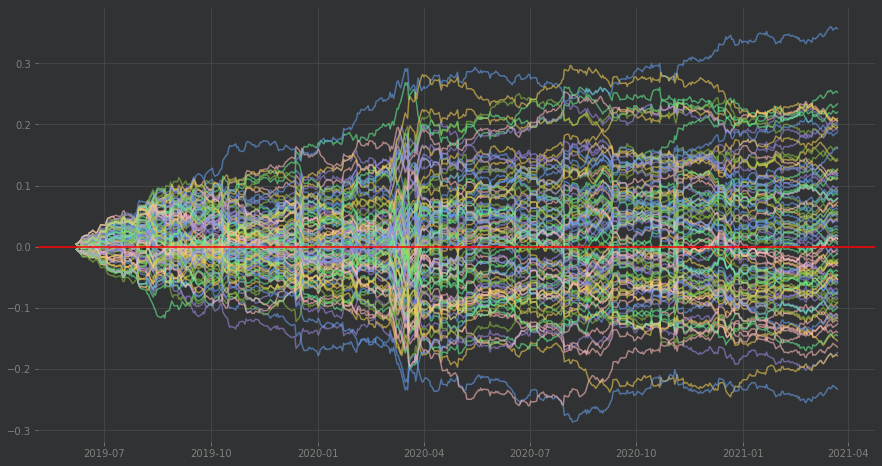

In [ ]:
""" IT IS NOT A MONTE CARLO SIMULATION """

# Organize well all the data
ANN_returns = pd.DataFrame(returns_test, index=[f"ANN n°{i}" for i in range(len(returns_test))]).transpose()

# Adapt the size of the graph
plt.figure(figsize=(15,8))

# Plot the returns
plt.plot(ANN_returns.cumsum(axis=0), alpha=0.6)

# Plot break-even line
plt.axhline(0, color="red")

# show the graph
plt.show()

# Create a criterion

In [ ]:
def drawdown_function(serie):

  # We compute Cumsum of the returns
  cum = serie.dropna().cumsum() + 1

  # We compute max of the cumsum on the period (accumulate max) # (1,3,5,3,1) --> (1,3,5,5,5)
  running_max = np.maximum.accumulate(cum)

  # We compute drawdown
  drawdown = cum/running_max - 1
  return drawdown

In [ ]:
# Create empty dataframe
values = pd.DataFrame(index=["ret/dd", "ret", "dd"])

# Compute return and max drawdawn for each ANN
for col in ANN_returns.columns:

  # Compute the returns and the max drawdown for one ANN
  ret, dd = ANN_returns[col].cumsum().iloc[-1], -np.min(drawdown_function(ANN_returns[col]))

  # Create a column containing the ret/dd ratio, the returns and the drawdown
  values[col] = ret/dd, ret, dd

In [ ]:
values.transpose().sort_values(by="ret/dd", ascending=False)

,ret/dd,ret,dd
ANN n°66,8.176570,0.356478,0.043597
ANN n°38,3.930648,0.198612,0.050529
ANN n°17,3.813769,0.206344,0.054105
ANN n°1,3.469979,0.252478,0.072761
ANN n°92,3.464149,0.190985,0.055132
...,...,...,...
ANN n°9,-0.679698,-0.178205,0.262182
ANN n°54,-0.720922,-0.113850,0.157923
ANN n°99,-0.725847,-0.153725,0.211787
ANN n°2,-0.815163,-0.173325,0.212626


In [ ]:
ANN_models = list(values.transpose().sort_values(by="ret/dd", ascending=False).index[0:3])

In [ ]:
ANN_models

['ANN n°66', 'ANN n°38', 'ANN n°17']

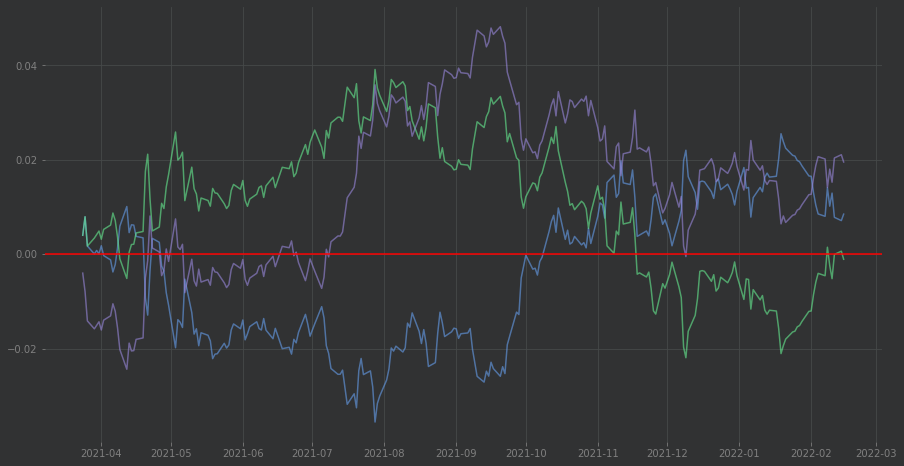

In [ ]:
""" Use the 3best models on the test set to trade on the validation set"""

# Organize the data 
ANN_val = pd.DataFrame(returns_val, index=[f"ANN n°{i}" for i in range(len(returns_val))]).transpose()

# Adapt the size
plt.figure(figsize=(15,8))

# Plot the portfolio method containing the 10 best strategies
plt.plot(ANN_val[ANN_models].cumsum(axis=0), alpha=0.6)

plt.axhline(0, color="red")

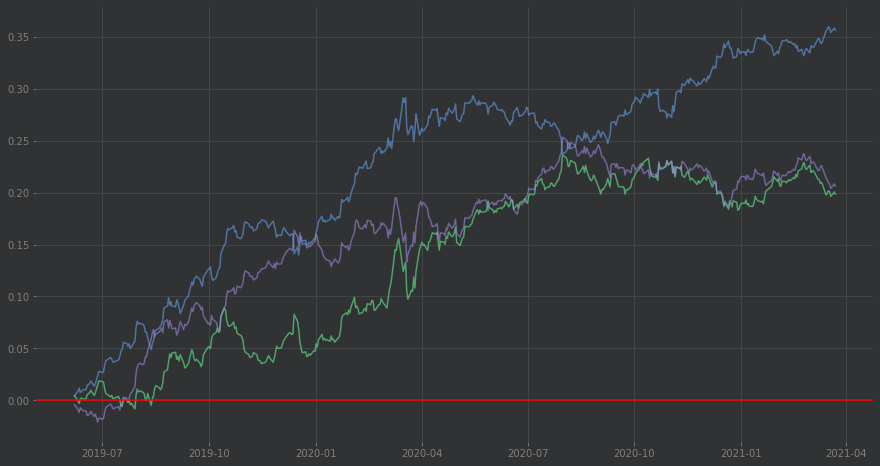

In [ ]:
""" Use the 3best models on the test set to trade on the test set"""

# Organize the data 
ANN_val = pd.DataFrame(returns_val, index=[f"ANN n°{i}" for i in range(len(returns_val))]).transpose()

# Adapt the size
plt.figure(figsize=(15,8))

# Plot the portfolio method containing the 10 best strategies
plt.plot(ANN_returns[ANN_models].cumsum(axis=0), alpha=0.6)

plt.axhline(0, color="red")

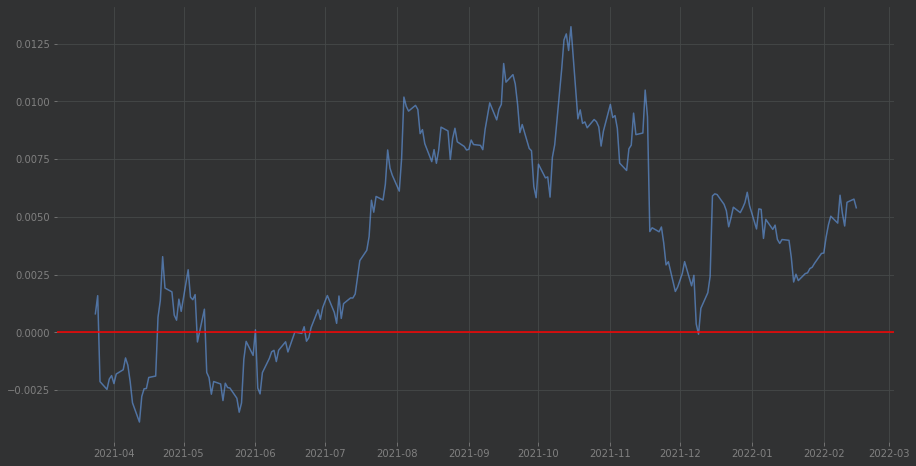

In [ ]:
""" Strategy created """
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the portfolio method containing the 10 best strategies
plt.plot(ANN_val[ANN_models].sum(axis=1).cumsum(axis=0)/3, alpha=0.6)
plt.axhline(0, color="red")

# Bagging method

In [ ]:
def ANN_weights():
  nb_hidden_layer=2
  # INTIALIZATION SEQUENTIAL MODEL
  regressor = Sequential()

  # FIRST LAYER
  regressor.add(Dense(25, input_shape=(X_train_sc.shape[1],), activation="relu"))

  # ADD HIDDEN LAYER
  for i in range(1,nb_hidden_layer):
    regressor.add(Dense(int(25/i), activation="relu"))

  # OUTPUT LAYER DENSE
  regressor.add(Dense(1, activation="linear"))

  # COMPILE THE MODEL
  regressor.compile(loss="mse", optimizer="adam")

  return regressor

In [ ]:
# Create empty dataframe
prediction = pd.DataFrame(index = dfc.index)
for nb in ANN_models:

  # Create ANN structure
  ann = ANN_weights()

  # Import trained weights
  ann.load_weights(f"Weights_ANN/{nb}")

  # Create predictions for the whole dataset
  pre = ann.predict(np.concatenate((X_train_sc,X_test_sc),
                                        axis=0))
  prediction[f"ANN n°{nb}"] = pre
prediction

,ANN n°ANN n°66,ANN n°ANN n°38,ANN n°ANN n°17
time,,,
2004-02-23,-0.004689,-0.011083,-0.008645
2004-02-24,-0.006123,-0.009280,-0.008154
2004-02-25,-0.003290,-0.008739,-0.009682
2004-02-26,-0.005514,-0.007695,-0.009800
2004-02-27,-0.004917,-0.007964,-0.009092
...,...,...,...
2022-02-09,0.022688,-0.009154,-0.008250
2022-02-10,0.013535,-0.015222,-0.003815
2022-02-11,0.011830,-0.016837,-0.008972


In [ ]:
prediction["Increase"] = (np.sign(prediction)==1).sum(axis=1)
prediction["Decrease"] = (np.sign(prediction)==-1).sum(axis=1)
prediction

,ANN n°ANN n°66,ANN n°ANN n°38,ANN n°ANN n°17,Increase,Decrease
time,,,,,
2004-02-23,-0.004689,-0.011083,-0.008645,0,3
2004-02-24,-0.006123,-0.009280,-0.008154,0,3
2004-02-25,-0.003290,-0.008739,-0.009682,0,3
2004-02-26,-0.005514,-0.007695,-0.009800,0,3
2004-02-27,-0.004917,-0.007964,-0.009092,0,3
...,...,...,...,...,...
2022-02-09,0.022688,-0.009154,-0.008250,1,2
2022-02-10,0.013535,-0.015222,-0.003815,1,2
2022-02-11,0.011830,-0.016837,-0.008972,1,2


In [ ]:
prediction

,ANN n°ANN n°66,ANN n°ANN n°38,ANN n°ANN n°17,Increase,Decrease,returns,position,strategy
time,,,,,,,,
2004-02-23,-0.004689,-0.011083,-0.008645,0,3,-0.002240,-1.0,NaN
2004-02-24,-0.006123,-0.009280,-0.008154,0,3,-0.007036,-1.0,0.007036
2004-02-25,-0.003290,-0.008739,-0.009682,0,3,0.004347,-1.0,-0.004347
2004-02-26,-0.005514,-0.007695,-0.009800,0,3,-0.001576,-1.0,0.001576
2004-02-27,-0.004917,-0.007964,-0.009092,0,3,0.003458,-1.0,-0.003458
...,...,...,...,...,...,...,...,...
2022-02-09,0.022688,-0.009154,-0.008250,1,2,-0.003893,-1.0,-0.003893
2022-02-10,0.013535,-0.015222,-0.003815,1,2,0.002772,-1.0,-0.002772
2022-02-11,0.011830,-0.016837,-0.008972,1,2,-0.005133,-1.0,0.005133


[*********************100%***********************]  1 of 1 completed


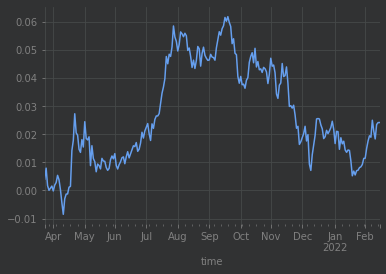

In [ ]:
# Put the daily return of the asset
prediction["returns"] = dfc["returns"]

# Compute the position doing a bagging on the best ANN
prediction["position"] = np.nan
prediction.loc[prediction["Increase"] > prediction["Decrease"], "position"] = 1
prediction.loc[prediction["Increase"] < prediction["Decrease"], "position"] = -1

# When you will run again the code you can have different results
# Compute and plot the strategy return on the validation test
# Very important to put the shift at he position,Don't forget!
prediction["strategy"] = prediction["returns"] * prediction["position"].shift(1)
split, split_val = int(0.85*len(dfc)), int(0.95*len(dfc))
prediction["strategy"].iloc[split_val:].cumsum().plot()